In [ ]:
#menghubungkan ke google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/BTC-USD-Oct.csv')
df = df.sort_values('Date').reset_index(drop=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-12,362.605988,379.433014,356.144012,378.549011,378.549011,17552800
1,2014-10-13,377.920990,397.226013,368.897003,390.414001,390.414001,35221400
2,2014-10-14,391.691986,411.697998,391.324005,400.869995,400.869995,38491500
3,2014-10-15,400.954987,402.226990,388.765991,394.773010,394.773010,25267100
4,2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,26990000


In [ ]:
df.shape

(2923, 7)

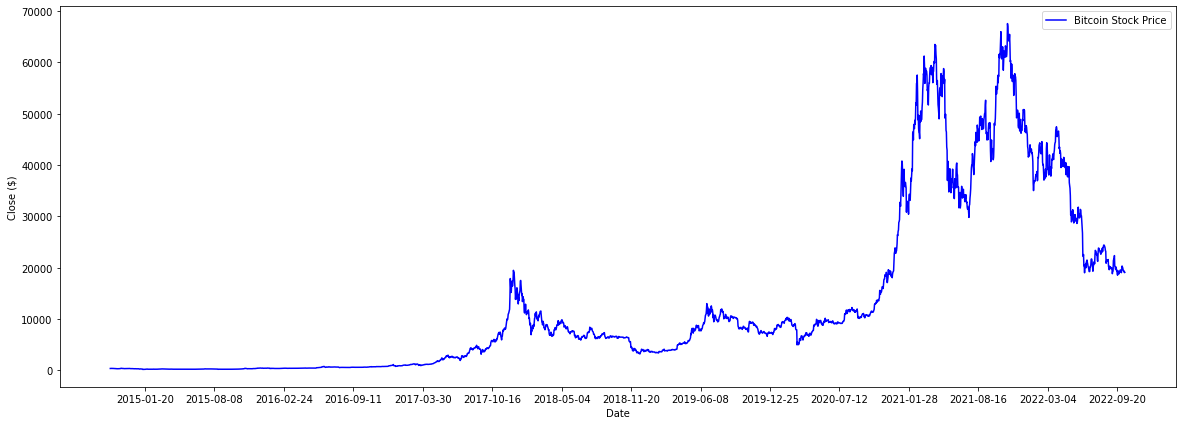

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

df['Close'] = df['Close'].astype(float)

plt.figure(figsize=(20,7))
plt.plot(df['Date'].values, df['Close'].values, label = 'Bitcoin Stock Price', color = 'blue')
plt.xticks(np.arange(100,df.shape[0],200))
plt.xlabel('Date')
plt.ylabel('Close ($)')
plt.legend()
plt.show()

#Data Preprocessing

In [ ]:
#Mebagi data test dan data latih
num_shape = 2000

train = df.iloc[:num_shape, 1:2].values
test = df.iloc[num_shape:, 1:2].values

In [ ]:
#Scaling feature
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train)

In [ ]:
X_train = []

#Price on next day
y_train = []

window = 60

for i in range(window, num_shape):
    X_train_ = np.reshape(train_scaled[i-window:i, 0], (window, 1))
    X_train.append(X_train_)
    y_train.append(train_scaled[i, 0])
X_train = np.stack(X_train)
y_train = np.stack(y_train)

#Membuat Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *

In [ ]:
# Initializing the Recurrent Neural Network
model = Sequential()
#Adding the first LSTM layer with a sigmoid activation function and some Dropout regularization
#Units - dimensionality of the output space

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
#melakukan fitting data
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 128);

Epoch 1/100
16/16 [==============================] - 15s 282ms/step - loss: 0.0286
Epoch 2/100
16/16 [==============================] - 4s 266ms/step - loss: 0.0050
Epoch 3/100
16/16 [==============================] - 4s 265ms/step - loss: 0.0038
Epoch 4/100
16/16 [==============================] - 4s 269ms/step - loss: 0.0035
Epoch 5/100
16/16 [==============================] - 4s 262ms/step - loss: 0.0031
Epoch 6/100
16/16 [==============================] - 4s 273ms/step - loss: 0.0030
Epoch 7/100
16/16 [==============================] - 4s 269ms/step - loss: 0.0030
Epoch 8/100
16/16 [==============================] - 4s 265ms/step - loss: 0.0027
Epoch 9/100
16/16 [==============================] - 4s 267ms/step - loss: 0.0028
Epoch 10/100
16/16 [==============================] - 4s 265ms/step - loss: 0.0027
Epoch 11/100
16/16 [==============================] - 4s 264ms/step - loss: 0.0025
Epoch 12/100
16/16 [==============================] - 6s 414ms/step - loss: 0.0028
Epoch 13/100

#Prediksi

In [ ]:
#prediksi
df_volume = np.vstack((train, test))

inputs = df_volume[df_volume.shape[0] - test.shape[0] - window:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

num_2 = df_volume.shape[0] - num_shape + window

X_test = []

for i in range(window, num_2):
    X_test_ = np.reshape(inputs[i-window:i, 0], (window, 1))
    X_test.append(X_test_)
    
X_test = np.stack(X_test)

In [ ]:
predict = model.predict(X_test)
predict = sc.inverse_transform(predict)

29/29 [==============================] - 3s 41ms/step


In [ ]:
#mengevaluasi model
diff = predict - test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

MSE: 54702250.189673126
MAE: 5574.627973688482
RMSE: 7396.0969564813795


#Hasil Prediksi



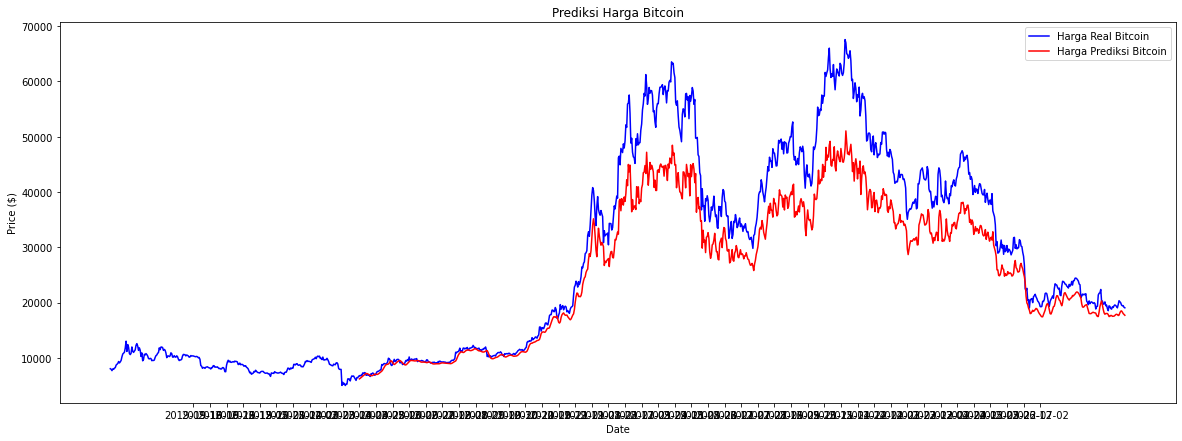

In [ ]:
#Memvisualisasikan hasil prediksi
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1700:], df_volume[1700:], color = 'blue', label = 'Harga Real Bitcoin')
plt.plot(df['Date'][-predict.shape[0]:].values, predict, color = 'red', label = 'Harga Prediksi Bitcoin')
plt.xticks(np.arange(100,df[1800:].shape[0],20))
plt.title('Prediksi Harga Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [ ]:
# The GRU architecture
modelGRU = Sequential()

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))
modelGRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 50)            7950      
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 50)               

In [ ]:
modelGRU.compile(optimizer='adam', loss='mean_squared_error')
modelGRU.fit(X_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
16/16 [==============================] - 15s 255ms/step - loss: 0.0230
Epoch 2/100
16/16 [==============================] - 4s 275ms/step - loss: 0.0040
Epoch 3/100
16/16 [==============================] - 5s 282ms/step - loss: 0.0027
Epoch 4/100
16/16 [==============================] - 4s 267ms/step - loss: 0.0023
Epoch 5/100
16/16 [==============================] - 5s 283ms/step - loss: 0.0019
Epoch 6/100
16/16 [==============================] - 4s 266ms/step - loss: 0.0021
Epoch 7/100
16/16 [==============================] - 5s 316ms/step - loss: 0.0020
Epoch 8/100
16/16 [==============================] - 5s 282ms/step - loss: 0.0017
Epoch 9/100
16/16 [==============================] - 5s 321ms/step - loss: 0.0022
Epoch 10/100
16/16 [==============================] - 5s 290ms/step - loss: 0.0017
Epoch 11/100
16/16 [==============================] - 7s 430ms/step - loss: 0.0017
Epoch 12/100
16/16 [==============================] - 6s 347ms/step - loss: 0.0017
Epoch 13/100

In [ ]:
predict = modelGRU.predict(X_test)
predict = sc.inverse_transform(predict)

29/29 [==============================] - 6s 63ms/step


In [ ]:
diff = predict - test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

MSE: 28042754.51655421
MAE: 3817.3044511230696
RMSE: 5295.5410031982765


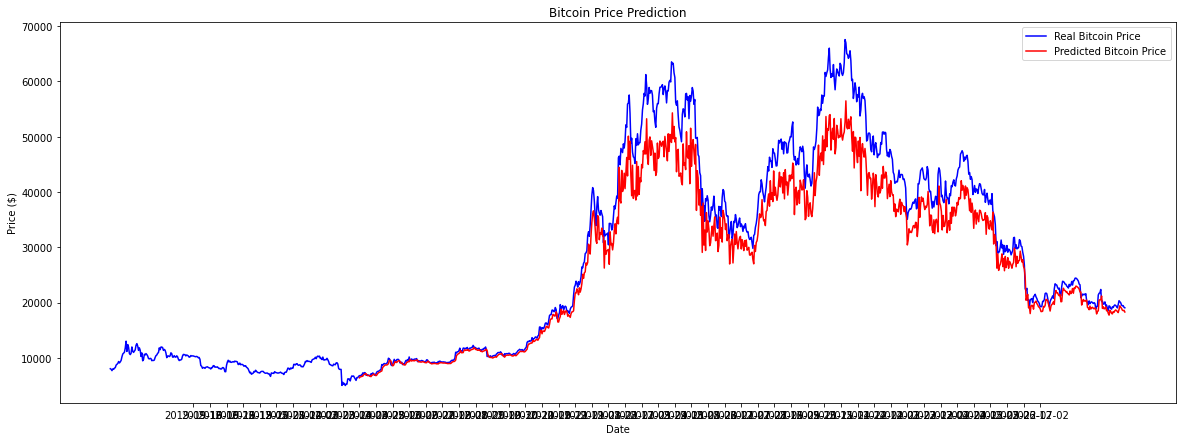

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1700:], df_volume[1700:], color = 'blue', label = 'Real Bitcoin Price')
plt.plot(df['Date'][-predict.shape[0]:].values, predict, color = 'red', label = 'Predicted Bitcoin Price')
plt.xticks(np.arange(100,df[1800:].shape[0],20))
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()